1. Python exercise
2. MNIST Data exercise  

    by - Akshay Tiwari

## Exercise 1 : python exercise

In [47]:
import itertools

Input: [1, 2, 3, 4] , Output: "4321"
Input: [9, 5, 30, 3, 34] , Output: "9534330"
Input: [0, 55, 50] , Output: "55500"

In [48]:
import itertools

def largest_number(input_list):
    """
    Arguments :
        - input_list : list of input numbers
    Returns :
        - joined list in a string format
    """ 
    changed = [[str(a) for a in ele] for ele in itertools.permutations(input_list)]

    return max([''.join(a) for a in changed])

In [49]:
input_list = [0, 55, 50]
largest_number(input_list)

'55500'

In [50]:
input_list = [1, 2, 3, 4]
largest_number(input_list)

'4321'

In [51]:
input_list = [9, 5, 30, 3, 34]
largest_number(input_list)

'9534330'

## Exercise 2 - Handwritten digit classification

In [2]:
import sys
import numpy as np
import pandas as pd

import pickle 
import gzip

import matplotlib.pyplot as plt

### Printing sample

In [3]:
# -*- coding: utf-8 -*-

def _float_to_block(d):
    keys = [0.2, 0.4, 0.6, 0.8, 1]
    mapping = {0.2: " ", 0.4: "░", 0.6: "▒", 0.8: "▓", 1: "█"} 
    for key in keys:
        if d <= key:
            return mapping[key]

In [4]:
def console_print(digit):
    """
    prints a digit using UTF-8 characters 
    digit: a numpy 2D array of shape (28,28)
    """
    for row in digit:
        line = ""
        for cell in row:
            line = line + _float_to_block(cell)
        print (line)

### Loading data

In [5]:
with gzip.open("./ericsson-mnist-assignment.pkl.gz", "rb") as f:
    data, labels = pickle.load(f, encoding="latin1") 
    f.close()

In [6]:
print ('Shape of the Data : ', data.shape, '\nShape of the Labels : ', labels.shape)

Shape of the Data :  (30000, 28, 28) 
Shape of the Labels :  (30000,)


In [7]:
print ('Training Set examples :')
for i in range(0,2):
    console_print(data[i])

Training Set examples :
                            
                            
                            
                            
                            
                            
                            
          ▒██▒▒░            
        ▒███████▓           
       ████▓▓▓▓██   ░       
      ███▓░     ▒ ░▓██      
     ▒██▓        ░████      
     ███░      ░▒████▒      
     ██▓      ▓███▓██░      
     ███░   ▓████▒░██░      
     ▒█████████▓░ ▓██░      
      ▓██████▒░   ▓██       
          ▒       ▓██       
                  ▓██       
                  ▓██       
                  ▓██       
                  ▓██       
                  ▓██░      
                  ▒██▓      
                  ░███      
                   ▒██      
                    █▓      
                            
                            
                            
                            
                            
               ▓█           
              ░██▒ 

### checking for nulls

In [8]:
print ('Number of null in the set : ', np.sum(np.isnan(data)))

Number of null in the set :  0


### Checking response class balance

In [67]:
valueCounts = pd.Series(labels).value_counts() / len(labels)
print (valueCounts)

1    0.119300
7    0.113033
3    0.108067
2    0.107433
0    0.106667
6    0.105200
9    0.102967
4    0.102767
5    0.098433
8    0.036133
dtype: float64


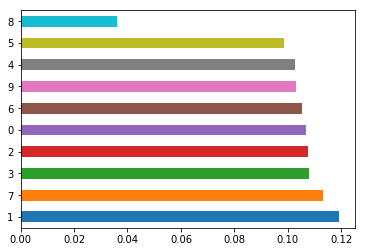

In [69]:
valueCounts.plot.barh()

- We notice that our classes are balanced in the training data, except label 8 which is just 3% of the data

### preparing the data for training 

In [10]:
print ('Dimension of each image after flattening : ', (data[0].flatten()).shape)

X = np.array([a.flatten() for a in data])
print ('Shape of the training set : ', X.shape)

Dimension of each image after flattening :  (784,)
Shape of the training set :  (30000, 784)


### Splitting into train and test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=3)

In [52]:
pd.Series(y_train).value_counts() / len(y_train)

1    0.121458
7    0.112000
2    0.107083
3    0.106750
0    0.105750
6    0.105000
9    0.103875
4    0.102333
5    0.099417
8    0.036333
dtype: float64

- Train/Test class split seems balanced proportionate to original dataset

### Model (Logistic Regression) fitting (entire dataset)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()

In [15]:
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Calculating Accuracy and Logloss

In [16]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [17]:
def score_res(true_res, pred_res, pred_prob=-1):
    if type(pred_prob) != int:
        lloss = log_loss(true_res, pred_prob)
        print ('Log Loss : {}'.format(lloss))
    accuracy = accuracy_score(true_res, pred_res)
    print ('Accuracy : {}'.format(accuracy))
    print ('\n Confusion Matrix : \n', confusion_matrix(true_res, pred_res))

In [18]:
predictions = lr.predict(X)
prediction_probs = lr.predict_proba(X)
score_res(labels, predictions, prediction_probs)

Log Loss : 0.43136876698830867
Accuracy : 0.8641666666666666

 Confusion Matrix : 
 [[3148    3    6    6    5    8   11    2    8    3]
 [   4 2528   28   16   19   19    3  860   21   81]
 [  19   22 2990   28   27   10   33   37   45   12]
 [  11   13   71 2977    6   74   10   25   26   29]
 [   5    9   16    5 2919    6   12    8   14   89]
 [  23   13   14   75   26 2688   53   14   21   26]
 [  13    9   12    1   10   46 3061    1    3    0]
 [   9 1193   41   14   32    8    8 1935   18  133]
 [  13   32   12   47    9   49   12   12  870   28]
 [  10   27   10   59   88   23    0   54    9 2809]]


### Interactive confusion matrix using plotly

In [36]:
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import plotly.graph_objs as go

In [37]:
def int_conf_mat(x, y):
    init_notebook_mode(connected=True)

    trace1 = {
      "x": np.unique(y), 
      "y": np.unique(y), 
      "z": confusion_matrix(x, y), 
      "colorscale": "Jet", 
      "type": "heatmap"
    }
    data_plot = [trace1]
    layout = {
      "barmode": "overlay", 
      "title": "Confusion Matrix", 
      "xaxis": {
        "title": "Predicted value", 
        "titlefont": {
          "color": "#7f7f7f", 
          "family": "Courier New, monospace", 
          "size": 18
        }
      }, 
      "yaxis": {
        "title": "True Value", 
        "titlefont": {
          "color": "#7f7f7f", 
          "family": "Courier New, monospace", 
          "size": 18
        }
      }
    }
    fig = go.Figure(data=data_plot, layout=layout)
    plotly.offline.iplot(fig)

int_conf_mat(labels, predictions)

- Interactive confusion matrix to analyze the predicted results. Please hover over the heatmap to get the values at any point.

-----

- We can use AUC-ROC, precision score, recall score as performance metrics but they won't be much helpful in this particular dataset.
- We will go ahead with other modelling approaches and compare them on the basis of log-loss, accuracy and confusion matrix observation

------

### Observing classwise accuracy 

In [39]:
pred_labels = pd.DataFrame(data={'labels': labels, 'predictions': predictions})
pred_labels.predictions.value_counts() 

1    3849
0    3255
3    3228
9    3210
6    3203
2    3200
4    3141
7    2948
5    2931
8    1035
Name: predictions, dtype: int64

In [40]:
pred_labels['accuracy'] = (pred_labels['predictions'] == pred_labels['labels'])
pred_labels.groupby(['labels'])['accuracy'].mean()

labels
0    0.983750
1    0.706343
2    0.927707
3    0.918260
4    0.946805
5    0.910261
6    0.969899
7    0.570628
8    0.802583
9    0.909356
Name: accuracy, dtype: float64

### Fitting Logistic Regression on train/test

In [41]:
lr_2 = LogisticRegression()

In [42]:
lr_2.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
predictions = lr_2.predict(x_test)
prediction_probs = lr_2.predict_proba(x_test)
score_res(y_test, predictions, prediction_probs)

Log Loss : 0.5053005789850795
Accuracy : 0.8388333333333333

 Confusion Matrix : 
 [[654   2   0   0   0   2   2   0   1   1]
 [  1 463   6   3   5   2   0 159   9  16]
 [  5   5 590  13   7   2   8   7  12   4]
 [  4   3  20 599   0  29   2  12   2   9]
 [  0   4   3   3 580   3   3   1   2  28]
 [  6   3   3  15   7 508  12   3   5   5]
 [  2   5   3   0   4  14 607   0   1   0]
 [  2 292  14   3  11   2   0 343   4  32]
 [  0  12   3  11   4  15   1   3 154   9]
 [  5   8   0  14  19   4   0   9   2 535]]


### Hyperparameter tuning for Logistic Regression

In [47]:
lr = LogisticRegression(penalty = 'l1')
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

print('Best Hyperparameters -')

# regularization penalty options
penalty = ['l1', 'l2']

# regularization hyperparameter options
C = [0.01, 0.3, 0.7, 1.0, 4, 10]

# hyperparameter dictionary
hyperparameters = dict(C=C, penalty=penalty, n_jobs=[-1])

# grid search using 5-fold cross validation
clf = GridSearchCV(lr, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(x_train, y_train)

In [50]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.7


In [51]:
# Prediction using best model
predictions = best_model.predict(x_test)
prediction_probs = best_model.predict_proba(x_test)
score_res(y_test, predictions, prediction_probs)

Log Loss : 0.5016850452916816
Accuracy : 0.8415

 Confusion Matrix : 
 [[652   2   0   0   0   2   3   0   1   2]
 [  1 459   4   2   6   2   0 167   9  14]
 [  5   5 591  12   6   2  10   7  10   5]
 [  2   2  22 602   0  26   2  12   2  10]
 [  1   4   2   1 583   2   3   1   2  28]
 [  4   3   4  12   8 510  14   1   5   6]
 [  2   5   4   0   4  13 606   1   1   0]
 [  2 279  13   3  11   2   0 358   3  32]
 [  0  14   4   9   4  18   0   3 152   8]
 [  6   7   0  14  21   3   0   8   1 536]]


### Fitting RF classifier with Hyperparemeter tuning

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
predictions = rfc.predict(x_test)
prediction_probs = rfc.predict_proba(x_test)
score_res(y_test, predictions, prediction_probs)

Log Loss : 0.7580602159145947
Accuracy : 0.8516666666666667

 Confusion Matrix : 
 [[649   1   2   2   2   2   3   0   1   0]
 [  1 474   5   1   8   0   1 168   1   5]
 [  8   6 611  10   6   1   3   3   4   1]
 [  3   6  20 618   0  17   3   4   0   9]
 [  0   4   4   1 590   0   3   1   1  23]
 [  5   4   2  20   4 525   4   1   0   2]
 [  8   3   3   0  11   8 603   0   0   0]
 [  2 332  12   0   2   3   0 338   1  13]
 [  4   8   9  16   1   9   1   4 155   5]
 [  5   4   2  11  15   5   2   4   1 547]]


In [ ]:
## Hyperparameter Tuning

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [4, 10],
    'n_estimators': [50, 100, 300, 500]
}
# Create a based model
rfc = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

In [58]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 500}

In [60]:
best_grid = grid_search.best_estimator_
predictions = best_grid.predict(x_test)
prediction_probs = best_grid.predict_proba(x_test)
score_res(y_test, predictions, prediction_probs)

Log Loss : 0.797950167818783
Accuracy : 0.869

 Confusion Matrix : 
 [[653   0   0   1   0   1   6   0   1   0]
 [  2 461   7   1   6   0   1 179   0   7]
 [  5   1 630   5   2   0   5   2   2   1]
 [  2   5  11 638   1   7   1   6   0   9]
 [  0   5   2   0 592   0   5   1   0  22]
 [  4   1   4  20   2 521  10   0   0   5]
 [  5   3   0   0   3   8 617   0   0   0]
 [  2 260  11   0   7   1   0 398   1  23]
 [  0  15   5  26   3  13   3   1 134  12]
 [  5   3   0  10   5   0   0   3   0 570]]


### Fitting SVC

In [61]:
from sklearn.svm import SVC

In [62]:
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
predictions = svc.predict(x_test)
score_res(y_test, predictions)

Accuracy : 0.8595

 Confusion Matrix : 
 [[651   1   2   1   0   3   2   2   0   0]
 [  1 459   8   1   7   0   0 182   0   6]
 [  4   8 606   6   9   2   8   2   7   1]
 [  2   9  11 608   1  26   1  14   1   7]
 [  1   2   4   0 586   0   4   2   0  28]
 [  3   4   5  10   5 526  11   0   2   1]
 [  6   4   7   0   5   5 609   0   0   0]
 [  1 267  11   1   6   3   0 396   1  17]
 [  0  14   4   9   2   9   1   5 166   2]
 [  5   4   0   7  16   3   0  11   0 550]]


### Fitting KNN

- Being an algorithm which is easy to implement and understand, KNN is a good choice to experiment.
- It sometimes might give better results than other complicated algorithms if the points are distinctly seperated in the vector space 

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
           weights='uniform')

In [70]:
predictions = knn.predict(x_test)
prediction_probs = knn.predict_proba(x_test)
score_res(y_test, predictions, prediction_probs)

Log Loss : 0.695785190672101
Accuracy : 0.8773333333333333

 Confusion Matrix : 
 [[658   0   0   0   0   1   3   0   0   0]
 [  0 435   1   0   1   0   0 225   0   2]
 [  7  11 619   2   0   0   2   8   1   3]
 [  0   1   7 653   0   7   0   7   0   5]
 [  1  13   0   0 599   0   0   2   0  12]
 [  3   2   0   2   1 549   6   1   0   3]
 [  4   3   1   0   1   3 622   2   0   0]
 [  0 310   3   0   1   0   0 383   0   6]
 [  0  10   0  14   1   6   3   2 171   5]
 [  1   3   0   7   0   1   0   9   0 575]]


### Fitting Convolutional Neural network

In [113]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Embedding
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

- CNN architechture : <br>
[[Conv2D->relu] -> [Conv2D->relu] -> MaxPool2D -> Dropout] -> [[Conv2D->relu] -> [Conv2D->relu] -> MaxPool2D -> Dropout] -> Flatten -> Dense -> Dropout -> Softmax
<br> <br>
- We'll use the 'data' which is not flattened to utilize the CNN architechture

In [111]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [112]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)          0         
__________

In [115]:
Y = to_categorical(labels, num_classes = 10)

data_train, data_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=3)
data_train, data_test = data_train.reshape(-1,28,28,1), data_test.reshape(-1,28,28,1)

print ('Shape of training Data : ', data_train.shape, '\nShape of testing Data : ', data_test.shape)
print ('Shape of training lables : ', y_train.shape, '\nShape of testing labels : ', y_test.shape)

Shape of training Data :  (24000, 28, 28, 1) 
Shape of testing Data :  (6000, 28, 28, 1)
Shape of training lables :  (24000, 10) 
Shape of testing labels :  (6000, 10)


In [124]:
print("Training model...")

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
batch_size = 32
epochs = 5

model.fit(data_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=True,
          validation_split=0.1)

Training model...
Train on 21600 samples, validate on 2400 samples
Epoch 1/5
21600/21600 [==============================] - 139s 6ms/step - loss: 0.2230 - acc: 0.8998 - val_loss: 0.2149 - val_acc: 0.9083
Epoch 2/5
21600/21600 [==============================] - 134s 6ms/step - loss: 0.2061 - acc: 0.9049 - val_loss: 0.1949 - val_acc: 0.9137
Epoch 3/5
21600/21600 [==============================] - 135s 6ms/step - loss: 0.1927 - acc: 0.9070 - val_loss: 0.1948 - val_acc: 0.9142
Epoch 4/5
21600/21600 [==============================] - 128s 6ms/step - loss: 0.1904 - acc: 0.9094 - val_loss: 0.1880 - val_acc: 0.9142
Epoch 5/5
21600/21600 [==============================] - 137s 6ms/step - loss: 0.1841 - acc: 0.9114 - val_loss: 0.1843 - val_acc: 0.9142


In [125]:
score, accuracy = model.evaluate(data_test, y_test,
                                batch_size=batch_size, 
                                verbose=True)

6000/6000 [==============================] - 12s 2ms/step


In [126]:
print('Test score: {:.3}'.format(score))
print('Test accuracy: {:.3}'.format(accuracy))

Test score: 0.173
Test accuracy: 0.916


In [127]:
prediction_probs = model.predict(data.reshape(-1,28,28,1))
predictions = np.argmax(prediction_probs, axis = 1)
int_conf_mat(labels, predictions)

- Reference : The Convolutional Neural Network architechture has been referred from a kaggle kernel - <br> 'introduction-to-cnn-keras-0-997-top-6' by 'yassineghouzam'

### Looking at errors

In [144]:
matchs = np.array(labels == predictions)
errors = np.where(matchs==False)[0]

In [147]:
print ('Looking at values predicted wrong by the model : ')
for i in range(0, 2):
    console_print(data[errors[i]])

Looking at values predicted wrong by the model : 
                            
                            
                            
                            
                            
                            
                            
      ░█▓▓░░                
     ▓████████░             
      ▓█████████▓           
         ░▒▓▓█████▒         
              ▓████░        
                ▓██░        
                 ██▓        
                 ▓██        
                 ███        
                 ██▓        
                ▒██░        
                ▓██░        
               ░███         
               ▓██░         
              ░███          
              ███░          
             ░███           
             ▓██░           
             ██▒            
             ▓▒             
                            
                            
                            
                            
                            
            █▓        

### Comments 

- CNN performs the best for our predictions out of all the models
- The best performing CNN gets confused between 7 and 1 which can be observed in the confusion matrix. The error can be understood intuitively as 7 and 1 when not presented clearly can be confusing even to human eyes. This can be improved with some more model tuning and data augmentation.
- The classwise accuracy is proportionate to the initial finding of the class balance in the dataset
- We have used regularization and then cross validation in our models to avoid overfitting on the training set

- We can also use oversampling for label '7' or '1' to overfit a particular class which might improve our overall accuracy